Ex. 1
Use the generate data() function from pyod.utils.data to generate a 2-
dimensional dataset with 500 normal samples (400 training samples and 100
test samples) with a contamination rate of 0.1.
Use pyplot.scatter() function to plot the training samples, choosing a dif-
ferent color for the outliers.

(400, 2)
(400,)
(100, 2)
(100,)
(40, 2)
(360, 2)


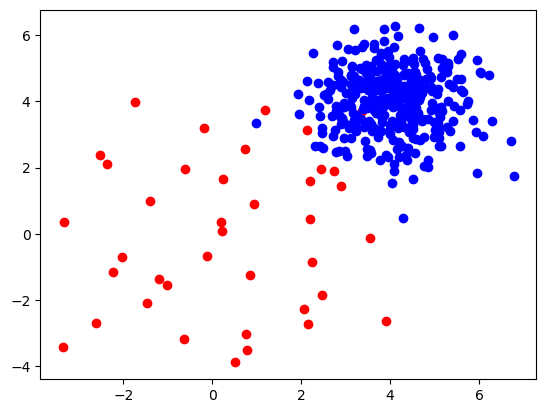

In [16]:
from pyod.utils.data import generate_data, get_outliers_inliers
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = generate_data(n_train=400, 
                                                 n_test=100, 
                                                 n_features=2, 
                                                 contamination=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# 1 = anomaly
# 0 = normal

X_outliers = []
X_inliers = []

for i, sample in enumerate(X_train):
    if y_train[i] == 1:
        X_outliers.append(sample)
    else:
        X_inliers.append(sample)

X_inliers = np.array(X_inliers)
X_outliers = np.array(X_outliers)
print(X_outliers.shape)
print(X_inliers.shape)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], c='blue')
plt.show()

Ex. 2
Choose a model from pyod (ex: KNN), leave all the parameters default (ex-
cept the contamination, which will match the contamination used for dataset
generation) and fit it with the training data. Get the predictions of the model
for both the training and the testing data.
Use the confusion matrix function from sklearn.metrics to find the
number of TN, TP, FN and FP and compute the balanced accuracy.
Use the roc curve() function from sklearn.metrics to compute the ROC
curve and then plot it with plot() function.
Change the contamination rate used by the model and see how the reported
metrics change.

In [17]:
from pyod.models.knn import KNN

clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# it is possible to get the prediction confidence as well
y_test_pred, y_test_pred_confidence = clf.predict(X_test, return_confidence=True)  


In [18]:
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

def compute_accuracy(predicted, true):
    res = sum(x == y for x, y in zip(predicted, true))
    return res

# evaluate and print the results
print("\nOn Training Data:")
print(f"Accuracy: {compute_accuracy(y_train_pred, y_train)*100 / len(y_train)}")
print("\nOn Test Data:")
print(f"Accuracy: {compute_accuracy(y_test_pred, y_test)*100 / len(y_test)}")



On Training Data:
Accuracy: 97.5

On Test Data:
Accuracy: 95.0


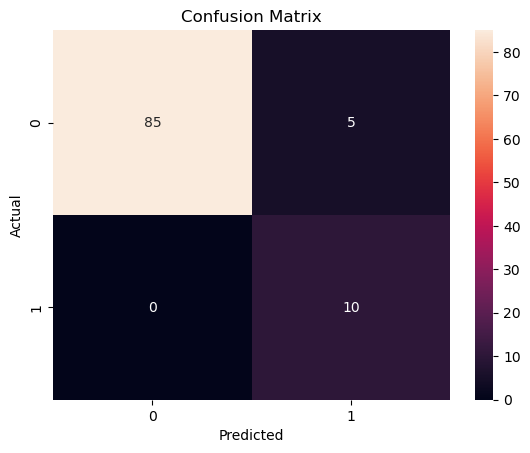

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
ba = (tpr + tnr) / 2
print(f"True negatives: {tn}")
print(f"True positives: {tp}")
print(f"False negatives: {fn}")
print(f"False positives: {fp}")
print(f"Balanced Accuracy: {ba}")


True negatives: 85
True positives: 10
False negatives: 0
False positives: 5
Balanced Accuracy: 0.9722222222222222


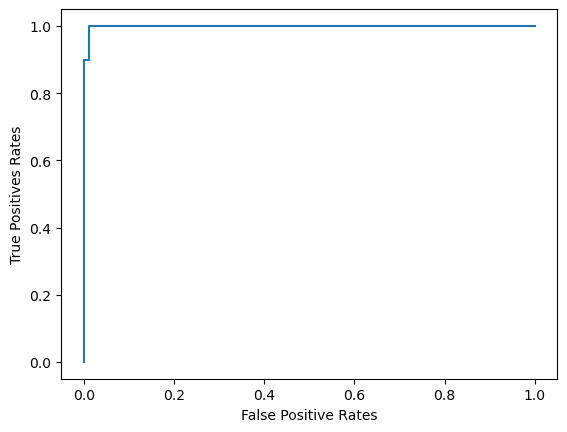

In [21]:
from sklearn.metrics import roc_curve, auc

frp, tpr, _ = roc_curve(y_test, y_test_scores)
plt.plot(frp, tpr)
plt.xlabel('False Positive Rates')
plt.ylabel('True Positives Rates')
plt.show()


Ex. 3
Generate a unidimensional dataset with 10 % contamination rate, 1000 train-
ing samples and no testing samples using generate data(). Try to detect the
anomalies in the dataset by using the Z-scores. In order to do that you should
compute the Z-score threshold that would classify the given percent (contami-
nation rate) of data as anomalies (use np.quantile() function). Compute the
balanced accuracy of the designed method.

In [29]:
X_train, X_test, y_train, y_test = generate_data(n_train=1000, 
                                                 n_test=0, 
                                                 n_features=1, 
                                                 contamination=0.1)

mean_data = np.mean(X_train)
std_dev = np.std(X_train)

z_scores = abs((X_train - mean_data)) / std_dev

quantile = np.quantile(z_scores, 0.9)

y_pred = [1 if x < quantile else 0 for x in z_scores]
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
print(f"True negatives: {tn}")
print(f"True positives: {tp}")
print(f"False negatives: {fn}")
print(f"False positives: {fp}")
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
ba = (tpr + tnr) / 2
print(f"Balanced Accuracy: {ba:.2f}")

True negatives: 100
True positives: 100
False negatives: 0
False positives: 800
Balanced Accuracy: 0.56


Ex. 4
Same as Ex. 3 but for a multidimensional dataset. Choose your own mean and
variance and build your dataset by hand. All other tasks as in Ex. 3.

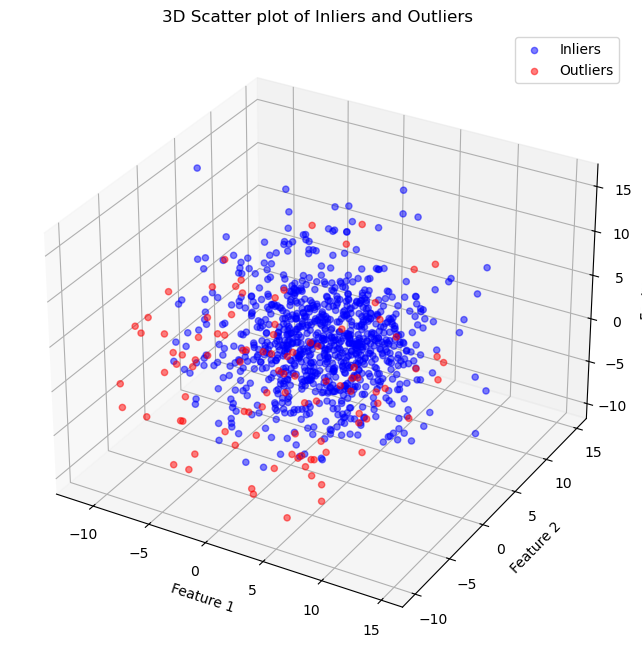

Balaced accuracy: 0.6388888888888888
Threshold: 2.1947299912174323


In [35]:
from sklearn.metrics import balanced_accuracy_score
from mpl_toolkits.mplot3d import Axes3D

n_samples = 1000
n_features = 3
contamination_rate = 0.1
n_inliers = int((1 - contamination_rate) * n_samples)
n_outliers = n_samples - n_inliers

mean_inliers = 2
std_inliers = 4
inliers = np.random.normal(loc=mean_inliers, scale=std_inliers, size=(n_inliers, n_features))

outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, n_features))

X = np.vstack([inliers, outliers])
y_true = np.hstack([np.zeros(n_inliers), np.ones(n_outliers)])

mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
z_scores = np.abs((X - mean_X) / std_X)
z_scores = np.max(z_scores, axis=1)  

threshold = np.quantile(z_scores, 1 - contamination_rate)

y_pred = (z_scores > threshold).astype(int)

balanced_acc = balanced_accuracy_score(y_true, y_pred)



# Scatter plot in 3D using the first three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting inliers and outliers
ax.scatter(X[y_true == 0][:, 0], X[y_true == 0][:, 1], X[y_true == 0][:, 2], 
           color='blue', label='Inliers', alpha=0.5)
ax.scatter(X[y_true == 1][:, 0], X[y_true == 1][:, 1], X[y_true == 1][:, 2], 
           color='red', label='Outliers', alpha=0.5)

# Setting labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter plot of Inliers and Outliers')

plt.legend()
plt.show()


print(f"Balaced accuracy: {balanced_acc}")
print(f"Threshold: {threshold}")
